In [ ]:
# Find-S Algorithm (super simple)

# Step 1: Dataset as list of lists
data = [
    ['Sunny','Warm','Normal','Strong','Warm','Same','Yes'],
    ['Sunny','Warm','High','Strong','Warm','Same','Yes'],
    ['Rainy','Cold','High','Strong','Warm','Change','No'],

    ['Sunny','Warm','High','Strong','Cool','Change','Yes']
]

# Step 2: Take only positive examples
positive = []
for row in data:
    if row[-1] == 'Yes':
        positive.append(row[:-1])   # all columns except label

# Step 3: Initial hypothesis = first positive example
hypothesis = positive[0].copy()

# Step 4: Compare with every positive example
for example in positive:
    for i in range(len(hypothesis)):
        if hypothesis[i] != example[i]:
            hypothesis[i] = '?'

# Step 5: Print final result
print("Final Hypothesis:", hypothesis)


Final Hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [ ]:
# Linear Regression using built-in functions

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Given data
x = np.array([0.5, 1.3, 2.1, 3.0, 4.2, 5.1, 6.4, 7.0, 8.3, 9.1, 10.0, 11.2,
              12.5, 13.0, 14.7, 15.5, 16.8, 17.4, 18.9, 20.0])
y = np.array([2.7, 4.3, 6.0, 7.7, 10.3, 11.5, 13.7, 15.2, 17.4, 18.9, 20.3, 22.5,
              24.9, 26.1, 28.8, 30.4, 32.2, 33.7, 36.3, 37.8])

# Training data (5 random samples)
x_train = np.array([[0.5], [3.0], [8.3], [14.7], [18.9]])
y_train = np.array([2.7, 7.7, 17.4, 28.8, 36.3])

# Test data
x_test = np.array([[5.1], [7.0], [10.0], [11.2], [14.7]])
y_test = np.array([11.5, 15.2, 20.3, 22.5, 28.8])

# Train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Equation: y = %.2f*x + %.2f" % (model.coef_[0], model.intercept_))
print("Mean Squared Error:", round(mse, 2))


Equation: y = 1.82*x + 2.08
Mean Squared Error: 0.04


In [ ]:
# Linear Regression (Ultra Simple Version)

# Training data
x = [0.5, 3.0, 8.3, 14.7, 18.9]
y = [2.7, 7.7, 17.4, 28.8, 36.3]

n = len(x)

# --------- Step 1: Summations ---------

sum_x = sum(x)
sum_y = sum(y)

sum_xy = 0
sum_x2 = 0
for i in range(n):
    sum_xy += x[i] * y[i]
    sum_x2 += x[i] * x[i]

# --------- Step 2: Slope and Intercept ---------

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x * sum_x)
c = (sum_y - m * sum_x) / n

print("Slope =", round(m, 2))
print("Intercept =", round(c, 2))
print("Equation: y =", round(m, 2), "* x +", round(c, 2))

# --------- Step 3: Prediction ---------

x_test = [5.1, 7.0, 10.0, 11.2, 14.7]
y_test = [11.5, 15.2, 20.3, 22.5, 28.8]

y_pred = []
for xval in x_test:
    y_pred.append(round(m * xval + c, 2))

print("Predicted values:", y_pred)

# --------- Step 4: Mean Squared Error ---------

error = 0
for i in range(len(x_test)):
    error += (y_test[i] - y_pred[i]) ** 2

mse = round(error / len(x_test), 2)
print("MSE =", mse)


Slope = 1.82
Intercept = 2.08
Equation: y = 1.82 * x + 2.08
Predicted values: [11.35, 14.8, 20.25, 22.43, 28.79]
MSE = 0.04


In [ ]:
# Naive Bayes (Short + Beginner Friendly)

# Training Data
data = [
    ['Sunny','Hot','High',False,'No'],
    ['Sunny','Hot','High',True,'No'],
    ['Overcast','Hot','High',False,'Yes'],
    ['Rain','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',False,'Yes'],
    ['Rain','Cool','Normal',True,'No'],
    ['Overcast','Mild','Normal',True,'Yes'],
    ['Sunny','Cool','High',False,'No'],
    ['Sunny','Mild','Normal',False,'Yes'],
    ['Rain','Mild','Normal',False,'Yes'],
    ['Sunny','Mild','High',True,'Yes'],
    ['Overcast','Hot','Normal',True,'Yes'],
    ['Overcast','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',True,'No']
]

X = [row[:-1] for row in data]    # features
Y = [row[-1]  for row in data]    # labels

# Priors
P_yes = Y.count('Yes') / len(Y)
P_no  = Y.count('No')  / len(Y)

# Likelihood function
def likelihood(feature_index, value, label):
    count = 0
    total = 0
    for i in range(len(X)):
        if Y[i] == label:
            total += 1
            if X[i][feature_index] == value:
                count += 1
    return (count + 1) / (total + 1)   # Laplace smoothing

# Prediction
def predict(sample):
    yes_p = P_yes
    no_p  = P_no

    for i in range(len(sample)):
        yes_p *= likelihood(i, sample[i], 'Yes')
        no_p  *= likelihood(i, sample[i], 'No')

    # normalize
    total = yes_p + no_p
    yes_p /= total
    no_p  /= total

    return ("Yes" if yes_p > no_p else "No", yes_p, no_p)


# Test
tests = [
    ('Sunny','Cool','High',True),
    ('Sunny','Hot','High',False)
]

for t in tests:
    pred, py, pn = predict(t)
    print("Input:", t)
    print("Prediction:", pred)
    print("P(Yes) =", round(py,3))
    print("P(No)  =", round(pn,3))
    print()


Input: ('Sunny', 'Cool', 'High', True)
Prediction: No
P(Yes) = 0.099
P(No)  = 0.901

Input: ('Sunny', 'Hot', 'High', False)
Prediction: No
P(Yes) = 0.338
P(No)  = 0.662



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

# Training data
data = pd.DataFrame([
    ['Sunny','Hot','High',False,'No'],
    ['Sunny','Hot','High',True,'No'],
    ['Overcast','Hot','High',False,'Yes'],
    ['Rain','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',False,'Yes'],
    ['Rain','Cool','Normal',True,'No'],
    ['Overcast','Mild','Normal',True,'Yes'],
    ['Sunny','Cool','High',False,'No'],
    ['Sunny','Mild','Normal',False,'Yes'],
    ['Rain','Mild','Normal',False,'Yes'],
    ['Sunny','Mild','High',True,'Yes'],
    ['Overcast','Hot','Normal',True,'Yes'],
    ['Overcast','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',True,'No']
], columns=['Outlook','Temperature','Humidity','Windy','Play'])

# Encode training data
encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Train Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X, y)

# Test samples
tests = [
    ('Sunny','Cool','High',True),
    ('Sunny','Hot','High',False)
]

for t in tests:
    # Convert test sample to DataFrame
    df_test = pd.DataFrame([t], columns=X.columns)

    # Encode test using SAME encoders
    for col in df_test.columns:
        df_test[col] = encoders[col].transform(df_test[col])

    # Predict class
    pred_num = model.predict(df_test)[0]
    pred_label = encoders['Play'].inverse_transform([pred_num])[0]

    # Predict probabilities
    probs = model.predict_proba(df_test)[0]
    p_no  = probs[ encoders['Play'].transform(['No'])[0]  ]
    p_yes = probs[ encoders['Play'].transform(['Yes'])[0] ]

    print(f"Input: {t}")
    print("Prediction:", pred_label)
    print("P(Yes) =", round(p_yes, 3))
    print("P(No)  =", round(p_no, 3))
    print()


|--- feature_1 <= 1.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0
|--- feature_1 >  1.50
|   |--- class: 1

Predictions: [1 1]


/tmp/ipython-input-1436718416.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  test.iloc[:, i] = encoders[i].transform(test.iloc[:, i])


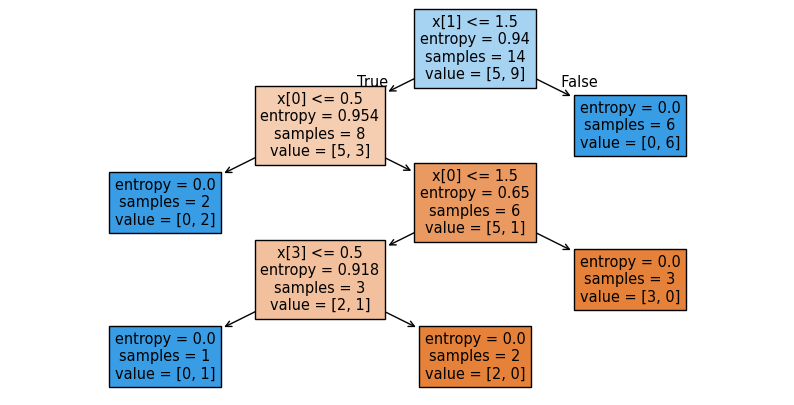

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Step 1: Dataset (no column names required)
data = [
    ['Sunny','Hot','High',False,'No'],
    ['Sunny','Hot','High',True,'No'],
    ['Overcast','Hot','High',False,'Yes'],
    ['Rain','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',False,'Yes'],
    ['Rain','Cool','Normal',True,'No'],
    ['Overcast','Mild','Normal',True,'Yes'],
    ['Sunny','Cool','High',False,'No'],
    ['Sunny','Mild','Normal',False,'Yes'],
    ['Rain','Mild','Normal',False,'Yes'],
    ['Sunny','Mild','High',True,'Yes'],
    ['Overcast','Hot','Normal',True,'Yes'],
    ['Overcast','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',True,'No']
]

df = pd.DataFrame(data)

# Step 2: Encode each column separately
encoders = []
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders.append(le)   # save encoder for test data

# Step 3: Split features and label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 4: Train decision tree
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

# Step 5: Display decision tree rules
print(export_text(model))

# Step 6: Prepare test samples
test = pd.DataFrame([
    ['Overcast','Mild','Normal',True],
    ['Sunny','Mild','High',False]
])

# Encode test using saved encoders
for i in range(test.shape[1]):
    test.iloc[:, i] = encoders[i].transform(test.iloc[:, i])

# Step 7: Predict
print("Predictions:", model.predict(test))

# Step 8: Plot decision tree
plt.figure(figsize=(10,5))
plot_tree(model, filled=True)
plt.show()


|--- Temperature <= 1.50
|   |--- Outlook <= 0.50
|   |   |--- class: 1
|   |--- Outlook >  0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|--- Temperature >  1.50
|   |--- class: 1

Predictions: [1 1]


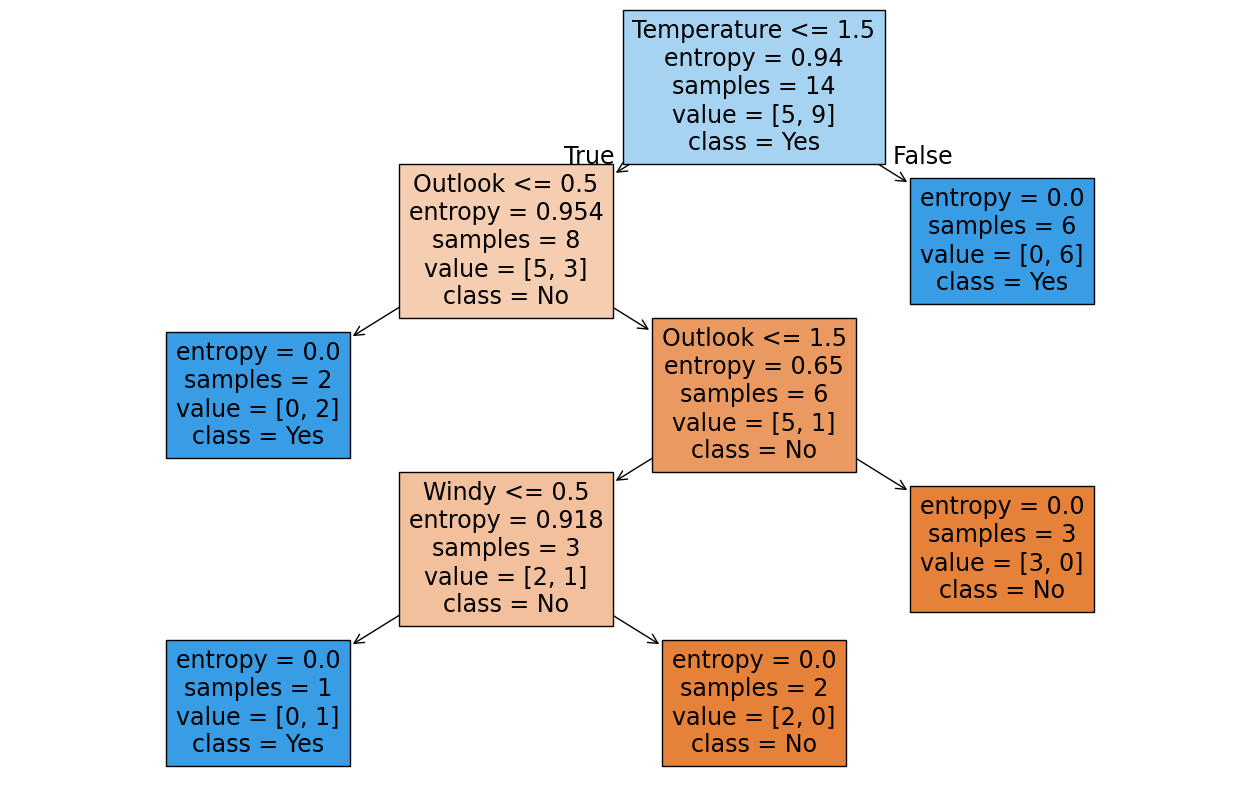

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# -------- Step 1: Dataset --------
data = pd.DataFrame([
    ['Sunny','Hot','High',False,'No'],
    ['Sunny','Hot','High',True,'No'],
    ['Overcast','Hot','High',False,'Yes'],
    ['Rain','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',False,'Yes'],
    ['Rain','Cool','Normal',True,'No'],
    ['Overcast','Mild','Normal',True,'Yes'],
    ['Sunny','Cool','High',False,'No'],
    ['Sunny','Mild','Normal',False,'Yes'],
    ['Rain','Mild','Normal',False,'Yes'],
    ['Sunny','Mild','High',True,'Yes'],
    ['Overcast','Hot','Normal',True,'Yes'],
    ['Overcast','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',True,'No']
], columns=['Outlook','Temperature','Humidity','Windy','Play'])

# -------- Step 2: Encode categorical data --------
enc = LabelEncoder()
for col in data.columns:
    data[col] = enc.fit_transform(data[col])

# -------- Step 3: Train the model --------
X = data[['Outlook','Temperature','Humidity','Windy']]
y = data['Play']

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

# -------- Step 4: Show the tree text version --------
print("\nDecision Tree Rules:\n")
print(export_text(model, feature_names=list(X.columns)))

# -------- Step 5: Prepare test samples --------
test = pd.DataFrame([
    ['Overcast','Mild','Normal',True],
    ['Sunny','Mild','High',False]
], columns=['Outlook','Temperature','Humidity','Windy'])

# Encode test data
for col in test.columns:
    test[col] = LabelEncoder().fit(data[col]).transform(test[col])

# Predict
pred = model.predict(test)
print("\nPredictions:", pred)

# -------- Step 6: Plot decision tree graph --------
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=list(X.columns), class_names=['No','Yes'], filled=True)
plt.show()


In [ ]:
# Decision Tree from scratch (simple conceptual version)
import math

# Step 1: Define dataset
dataset = [
    ['Sunny','Hot','High',False,'No'],
    ['Sunny','Hot','High',True,'No'],
    ['Overcast','Hot','High',False,'Yes'],
    ['Rain','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',False,'Yes'],
    ['Rain','Cool','Normal',True,'No'],
    ['Overcast','Mild','Normal',True,'Yes'],
    ['Sunny','Cool','High',False,'No'],
    ['Sunny','Mild','Normal',False,'Yes'],
    ['Rain','Mild','Normal',False,'Yes'],
    ['Sunny','Mild','High',True,'Yes'],
    ['Overcast','Hot','Normal',True,'Yes'],
    ['Overcast','Mild','High',False,'Yes'],
    ['Rain','Cool','Normal',True,'No']
]

attributes = ['Outlook','Temperature','Humidity','Windy']
label_index = 4

# Step 2: Entropy function
def entropy(data):
    total = len(data)
    if total == 0: return 0
    pos = sum(1 for d in data if d[label_index] == 'Yes')
    neg = total - pos
    p1 = pos/total if pos else 0
    p2 = neg/total if neg else 0
    return -(p1*math.log2(p1) + p2*math.log2(p2)) if p1 and p2 else 0

# Step 3: Information gain
def info_gain(data, attr_index):
    base = entropy(data)
    vals = set(d[attr_index] for d in data)
    splits = []
    for v in vals:
        subset = [d for d in data if d[attr_index]==v]
        splits.append((len(subset)/len(data))*entropy(subset))
    return base - sum(splits)

# Step 4: Pick best attribute
best_attr = max(range(len(attributes)), key=lambda i: info_gain(dataset,i))
print("Best Attribute to split:", attributes[best_attr])


Best Attribute to split: Temperature


In [ ]:
# OR Gate using single layer perceptron

import numpy as np

# Inputs and Outputs
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,1])

# Initialize weights and bias
w = np.zeros(2)
b = 0
lr = 0.1  # learning rate

# Activation function (step)
def step(x):
    return 1 if x > 0 else 0

# Training
for _ in range(10):   # 10 epochs
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        z = np.dot(w, x) + b
        y_pred = step(z)
        error = y - y_pred
        # Update rule
        w = w + lr * error * x
        b = b + lr * error

print("Weights:", w)
print("Bias:", b)

# Testing
for i in range(len(X)):
    print(f"Input: {X[i]}, Output: {step(np.dot(w,X[i])+b)}")


Weights: [0.1 0.1]
Bias: 0.0
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


In [ ]:
# Perceptron for Y = (A'B) + (A C') + (B' C)

import numpy as np

# Inputs (A,B,C)
X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
])

# Output (Y)
Y = np.array([0,1,1,1,1,1,1,0])

# Initialize weights and bias
w = np.zeros(3)
b = 0
lr = 0.1

# Activation (step function)
def step(x):
    return 1 if x > 0 else 0

# Training loop
for _ in range(20):
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        z = np.dot(w, x) + b
        y_pred = step(z)
        error = y - y_pred
        w = w + lr * error * x
        b = b + lr * error

print("Final Weights:", w)
print("Final Bias:", b)

# Test the model
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {step(np.dot(w,X[i])+b)}, Actual: {Y[i]}")


Final Weights: [-0.1 -0.2 -0.1]
Final Bias: 0.20000000000000004
Input: [0 0 0], Predicted: 1, Actual: 0
Input: [0 0 1], Predicted: 1, Actual: 1
Input: [0 1 0], Predicted: 1, Actual: 1
Input: [0 1 1], Predicted: 0, Actual: 1
Input: [1 0 0], Predicted: 1, Actual: 1
Input: [1 0 1], Predicted: 0, Actual: 1
Input: [1 1 0], Predicted: 0, Actual: 1
Input: [1 1 1], Predicted: 0, Actual: 0


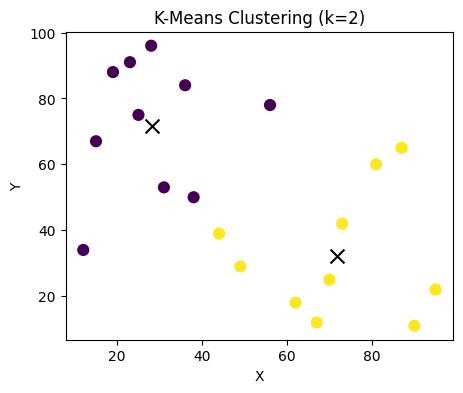

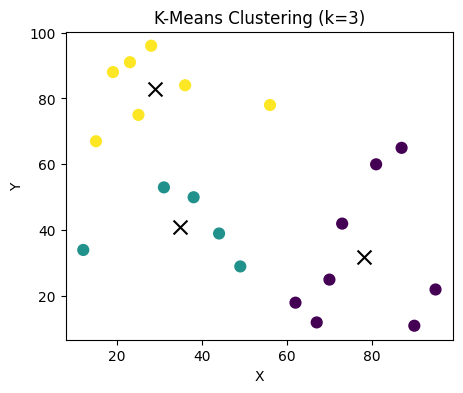

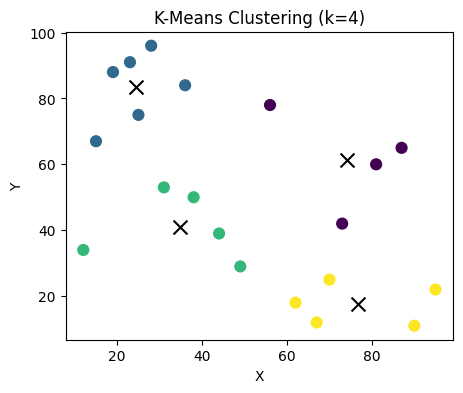

In [ ]:
# K-Means Clustering with k=2, 3, and 4 and plotting each iteration

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data points
points = np.array([
    [12,34],[87,65],[23,91],[56,78],[44,39],
    [19,88],[70,25],[31,53],[62,18],[90,11],
    [15,67],[28,96],[73,42],[36,84],[49,29],
    [81,60],[67,12],[25,75],[38,50],[95,22]
])

# Function to plot clusters for each k
def plot_kmeans(k):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(points)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    plt.figure(figsize=(5,4))
    plt.scatter(points[:,0], points[:,1], c=labels, s=60)
    plt.scatter(centers[:,0], centers[:,1], c='black', marker='x', s=100)
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Plot for k=2, 3, 4
for k in [2, 3, 4]:
    plot_kmeans(k)



==== K = 2 ====


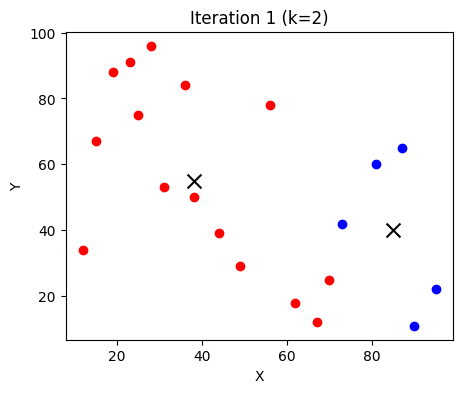

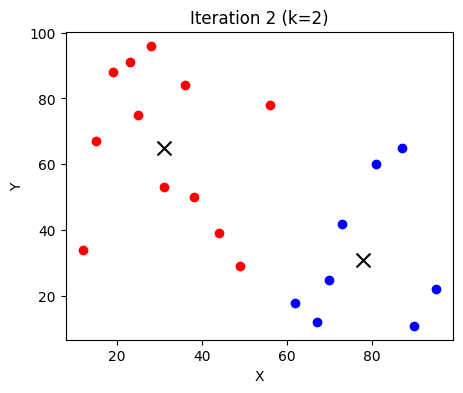

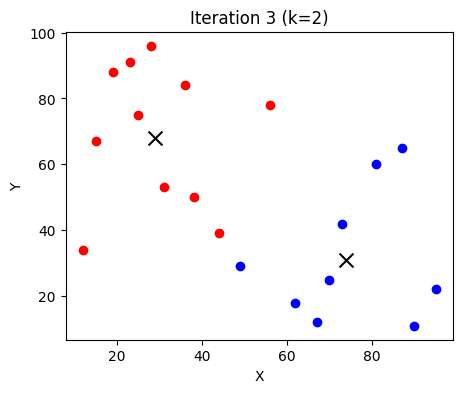

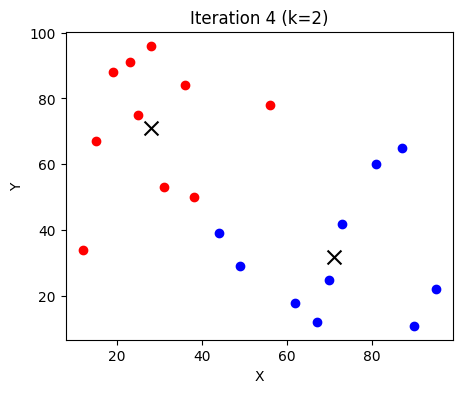

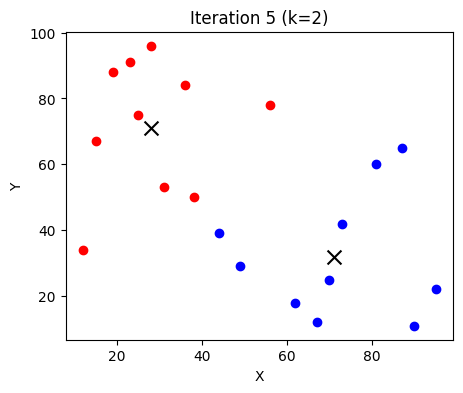

Final Centroids:
 [[28 71]
 [71 32]]

==== K = 3 ====


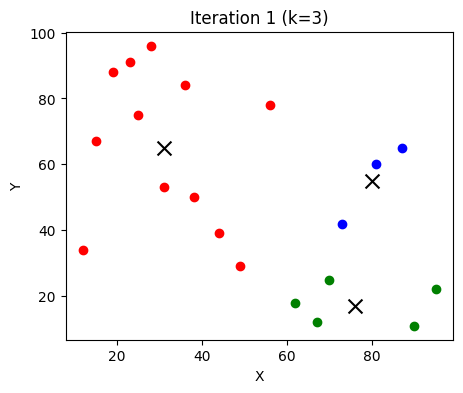

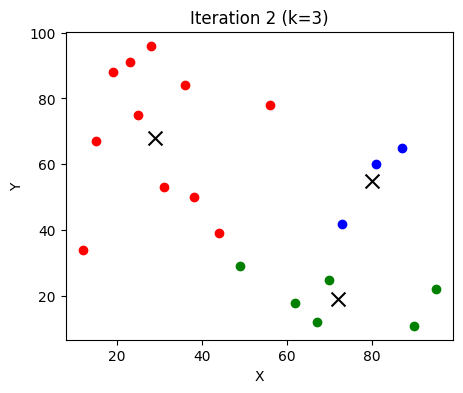

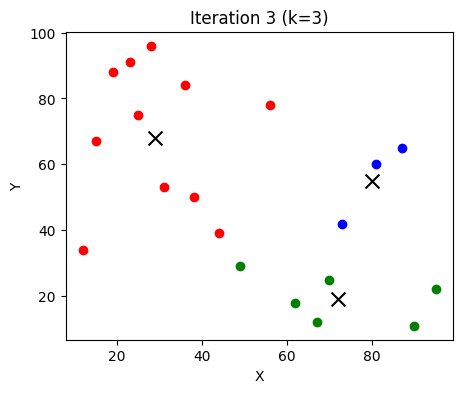

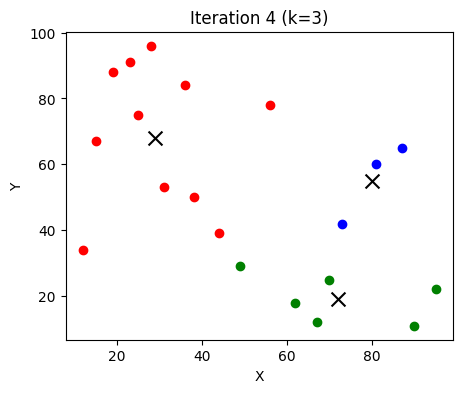

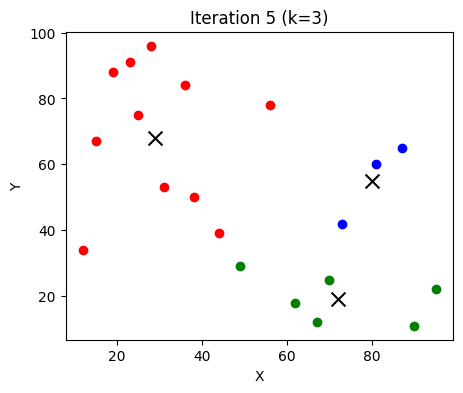

Final Centroids:
 [[29 68]
 [80 55]
 [72 19]]

==== K = 4 ====


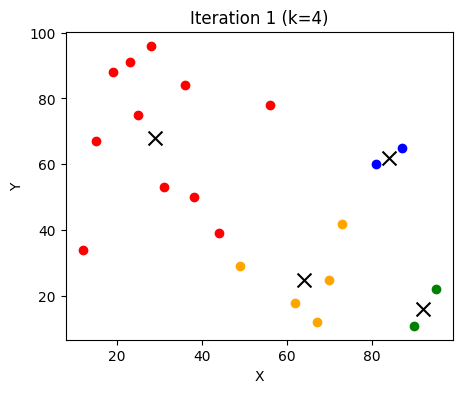

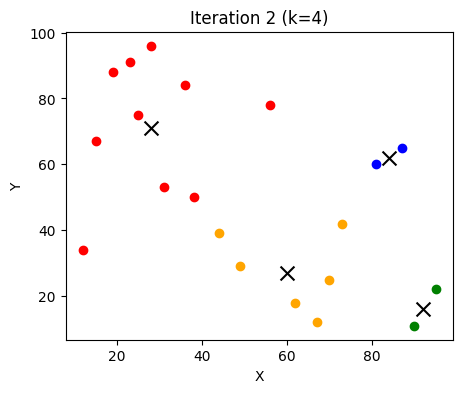

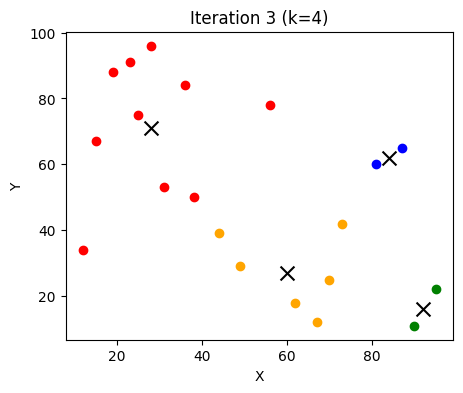

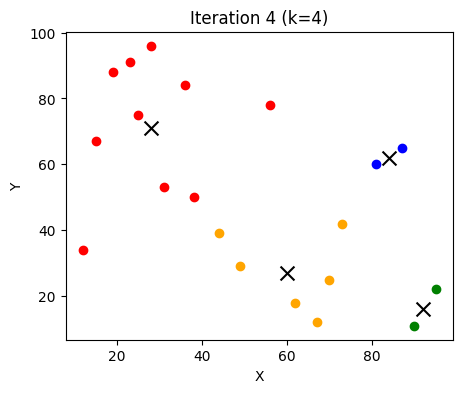

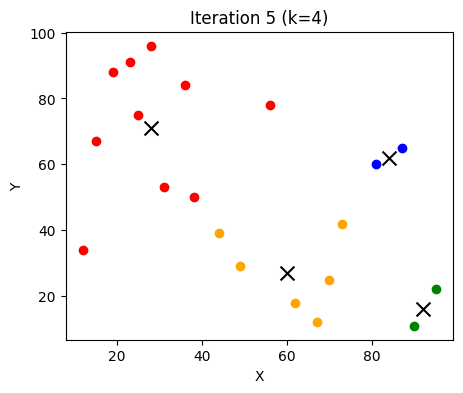

Final Centroids:
 [[28 71]
 [84 62]
 [92 16]
 [60 27]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data points
points = np.array([
    [12,34],[87,65],[23,91],[56,78],[44,39],
    [19,88],[70,25],[31,53],[62,18],[90,11],
    [15,67],[28,96],[73,42],[36,84],[49,29],
    [81,60],[67,12],[25,75],[38,50],[95,22]
])

# Step 2: Function to compute distance
def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Step 3: K-Means function (from scratch)
def kmeans(X, k, iterations=5):
    # Randomly initialize centroids
    np.random.seed(0)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for it in range(iterations):
        # Step 1: Assign each point to nearest centroid
        clusters = [[] for _ in range(k)]
        for point in X:
            dists = [euclidean(point, c) for c in centroids]
            cluster_idx = np.argmin(dists)
            clusters[cluster_idx].append(point)

        # Step 2: Store old centroids for plotting
        old_centroids = centroids.copy()

        # Step 3: Compute new centroids (mean of clusters)
        for i in range(k):
            if len(clusters[i]) > 0:
                centroids[i] = np.mean(clusters[i], axis=0)

        # Step 4: Plot iteration
        colors = ['red','blue','green','orange','purple']
        plt.figure(figsize=(5,4))
        for i in range(k):
            cluster = np.array(clusters[i])
            if len(cluster) > 0:
                plt.scatter(cluster[:,0], cluster[:,1], c=colors[i])
        plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x', s=100)
        plt.title(f'Iteration {it+1} (k={k})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

    return centroids, clusters

# Step 4: Run K-Means for k = 2, 3, and 4
for k in [2,3,4]:
    print(f"\n==== K = {k} ====")
    final_centroids, final_clusters = kmeans(points, k)
    print("Final Centroids:\n", final_centroids)
